In [1]:
#@title Preparing the data
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the dataset
df = pd.read_csv('Data.csv') # Advertisement Clickthrough Rate data

### Thompson Sampling algorithm
**Step 1:** At each round *n*, we consider two numbers for each ad *i*:
* $N_i^1(n)$ - the number of times the ad *i* got reward 1 up to round *n*,
* $N_i^0(n)$ - the number of times the ad *i* got reward 0 up to round *n*.

**Step 2:** For each ad *i*, we take a random draw from the distribution below:
$$\theta_i(n) = \beta(N_i^1(n) + 1,\space N_i^0(n) + 1); \text{where} \space\beta\space \text{is Beta Distribution}$$

**Step 3:** We select the ad *i* that has the highest $\theta_i(n)$.

In [2]:
#@title The Algorithm
class Thompson(object):
  def __init__(self, dataframe):
    ### Step 1
    self.df = dataframe
    self.N = self.df.shape[0] # Number of users
    self.d = self.df.shape[1] # Number of ads
    self.ads_selected = list()
    self.numbers_of_rewards_1 = [0] * self.d
    self.numbers_of_rewards_0 = [0] * self.d
    self.total_reward = 0
  
  def get_random_beta(self, index):
    self.random_beta = np.random.beta(a = self.numbers_of_rewards_1[index] + 1,
                                      b = self.numbers_of_rewards_0[index] + 1)
    return self.random_beta
  
  def update_rewards(self, ad, reward):
    if reward == 1:
        self.numbers_of_rewards_1[ad] = self.numbers_of_rewards_1[ad] + 1
    else:
        self.numbers_of_rewards_0[ad] = self.numbers_of_rewards_0[ad] + 1
    self.total_reward = self.total_reward + reward
  
  def run(self):
    assert len(self.ads_selected) == 0, 'Algorithm has already been run!'
    ### Step 2
    for n in range(0, self.N):
      ad, max_random = 0, 0

      for i in range(0, self.d):
        random_beta = self.get_random_beta(i)

    ### Step 3
        if random_beta > max_random:
          max_random = random_beta
          ad = i
      
      # Update the variables
      self.ads_selected.append(ad)
      reward = self.df.iloc[n, ad]
      self.update_rewards(ad, reward)

  def visualize(self):
    assert len(self.ads_selected) > 0, 'First run the UCB algorithm!'
    plt.hist(self.ads_selected, ec = 'black')
    plt.xticks(range(0, self.d))
    plt.title('Histogram of ads selections', size = 18)
    plt.xlabel('Ads', size = 14)
    plt.ylabel('# of times ad was selected', size = 14) 



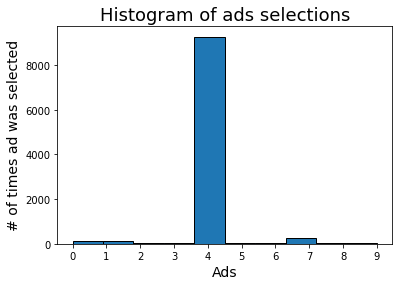

In [3]:
#@title Visualizing the Thompson Sampling results
model = Thompson(df)
model.run()
model.visualize()